# Significance Tests

![](https://drive.google.com/uc?id=1AD3wA3QnMiBM1UI3KKoAv-WQopJT_3f4)

# Multiple Tests

In [ ]:
def mult_test_err(c: int) -> float:
    return round((1 - (0.95) ** c) * 100, 1)


# Test for c=3
mult_test_err(c=3)

14.3

In [ ]:
# Test for c=5
mult_test_err(c=5)

22.6

In [ ]:
# Bonferroni Approach 1
print(round(0.05 / 3, 3))

# Bonferroni Approach 2
print(0.03 * 3)

0.017
0.09


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import the modules
import pandas as pd

# Import the data
# Source: https://www.kaggle.com/datasets/lsind18/weight-vs-age-of-chicks-on-different-diets
data = pd.read_csv("/content/gdrive/MyDrive/YouTube/dataAnalysisPlaylist/practical-statistics-for-data-scientists/media/ChickWeight.csv")\
            .drop(columns=["Unnamed: 0"])
# Trace
data.sample(n=5, random_state=43)

,weight,Time,Chick,Diet
309,114,10,28,2
407,166,14,36,3
35,202,21,3,1
69,160,18,6,1
553,322,21,48,4


In [ ]:
# Unmount the gdrive
drive.flush_and_unmount()

In [ ]:
def calc_missing(df: pd.DataFrame) -> pd.DataFrame:
    """Returns the missing percentages of the given frame.

    Args:
        df (pd.DataFrame): The Dataframe. 

    Returns:
        pd.DataFrame: The missing percentages.
    """
    # Calculate the number of missing values
    missing = df.isnull().sum()
    # Calculate the missing percentages
    percent_missing = missing * 100 / len(df)
    # Create a frame with dict format
    missing_value_df = pd.DataFrame(
        {"num_missing": missing, "percent_missing": percent_missing}
    )
    # Round the percentage values
    missing_value_df = round(number=missing_value_df, ndigits=2)
    # Sort from highest to lowest
    missing_value_df.sort_values("percent_missing", inplace=True)
    # Return the missing value frame
    return missing_value_df


# Trace the missing values
calc_missing(df=data)

,num_missing,percent_missing
weight,0,0.0
Time,0,0.0
Chick,0,0.0
Diet,0,0.0


In [ ]:
# Get dummies of the "Diet" feature
data_dummies = pd.get_dummies(data=data, columns=["Diet"])
# Trace
data_dummies.sample(n=5, random_state=43)

,weight,Time,Chick,Diet_1,Diet_2,Diet_3,Diet_4
309,114,10,28,0,1,0,0
407,166,14,36,0,0,1,0
35,202,21,3,1,0,0,0
69,160,18,6,1,0,0,0
553,322,21,48,0,0,0,1


In [ ]:
# Observed results
for i in range(1, 5):
    # Calculate the mean of the given diet
    diet_mean = round(
        data_dummies.loc[getattr(data_dummies, f"Diet_{i}") == 1, "weight"].mean(), 3
    )
    # Trace
    print(f"Diet {i}: {diet_mean}")

# Delete not needed objects
del diet_mean

Diet 1: 102.645
Diet 2: 122.617
Diet 3: 142.95
Diet 4: 135.263


In [ ]:
data.groupby("Diet").weight.mean()

Diet
1    102.645455
2    122.616667
3    142.950000
4    135.262712
Name: weight, dtype: float64

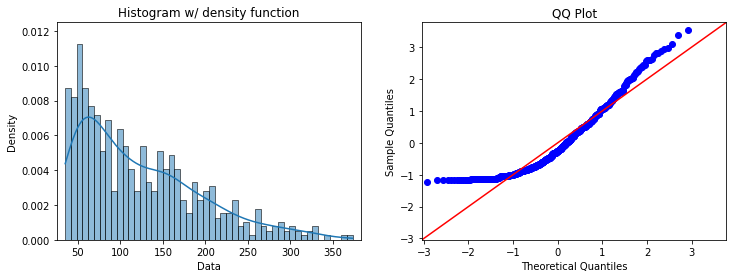

In [ ]:
# Import the modules
import matplotlib.pyplot as plt

from scipy.stats import norm
from seaborn import histplot
from statsmodels.api import ProbPlot

# Declare the weight values
weights = data.weight.values
# Declare a Probability Plot object
pplot = ProbPlot(data=weights,
                 dist=norm, fit=True)

# Figure setup
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# Histogram of the original data
histplot(x=weights, kde=True, stat="density", bins=50, ax=axes[0])
# X and y lims
axes[0].set_xlim(xmin=weights.min() - 10, xmax=weights.max() + 10)
axes[0].set_ylim(ymin=0., ymax=0.0125)
# X label
axes[0].set_xlabel(xlabel="Data")
# Title
axes[0].set_title(label="Histogram w/ density function")
# QQ plot
pplot.qqplot(line="45", ax=axes[1])
# Title
axes[1].set_title(label="QQ Plot")

# Show the plots
plt.show()

In [ ]:
# Import the modules
import numpy as np


def permutation_test(df: pd.DataFrame) -> np.float64:
    # Copy the frame
    df_cp = df.copy()
    # Permute the weights
    df_cp.loc[:, "weight"] = np.random.permutation(weights)
    # Return the variance
    return df_cp.groupby("Diet").weight.mean().var()

In [ ]:
# Observed variance
obs_var = data.groupby("Diet").weight.mean().var()

# Permutation test
perm_variance = [permutation_test(df=data) for _ in range(3000)]
# Trace
print('Pr(Prob)', np.mean([var > obs_var for var in perm_variance]))

Pr(Prob) 0.0003333333333333333


In [ ]:
# Import the modules
from scipy.stats import f_oneway

# Extract groups from the data
groups = [
    data_dummies.loc[data_dummies.Diet_1 == 1, "weight"].values,
    data_dummies.loc[data_dummies.Diet_2 == 1, "weight"].values,
    data_dummies.loc[data_dummies.Diet_3 == 1, "weight"].values,
    data_dummies.loc[data_dummies.Diet_4 == 1, "weight"].values,
]
# One-way ANOVA test
f_statistic, p_value = f_oneway(*groups)
# Trace the results
print("F-statistic:", round(f_statistic, 3))
print("p-value:", round(p_value, 5), p_value < 0.05)

F-statistic: 10.81
p-value: 0.0 True
